<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: Kriging 1D applied to a row in a asingle image </font>
</div>

- **Fecha**: 2023/06/06
        
- **Objetivos**: Procesamiento de imagen basado en Kriging
- **Descripción** Tutorial for determining how it works

- **Autores**: 
    - Luis Miguel Sánchez Brea
    - Luis Blas Braunschweig Leotte

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [4]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 160
rcParams['lines.markersize']=10
rcParams['image.cmap']='gray'
rcParams['figure.figsize']=(3,3)

%matplotlib widget


# Experimental variogram 

In [5]:

from phyton_kriging import np, plt


from phyton_kriging.variogram_1D import experimental, theoretical, fitting

from phyton_kriging.standard_1D import kriging1D


# Uploading Image

Leemos una imagen cualqueira, se ha elegido una en la que tenemos en cuenta parte del cielo

In [6]:
import cv2

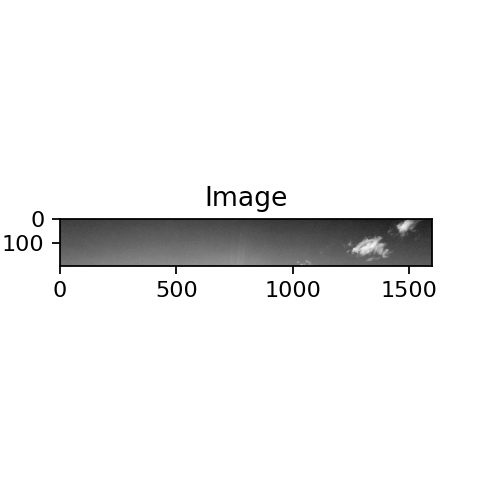

1600


In [9]:
path=r'G0090096_1674924462399.jpg'
image = cv2.imread(path)
color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
gray=gray[0:200,:]
plt.figure()
plt.imshow(gray)
plt.title('Image')
plt.show()

num_y,num_x=np.shape(gray)



print(num_x)


# Variograma en 1D, elección de tipo y parametrización

2023-06-15 15:10:21,433 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=3.57
2023-06-15 15:10:23,003 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.5727415164150598, best pos: [  1.9986  25.047  304.828 ]
2023-06-15 15:10:25,912 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=3.24
2023-06-15 15:10:27,536 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.2359441482187568, best pos: [  1.9997  24.5695 305.9991]
2023-06-15 15:10:32,811 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=3.2
2023-06-15 15:10:34,530 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.19650583

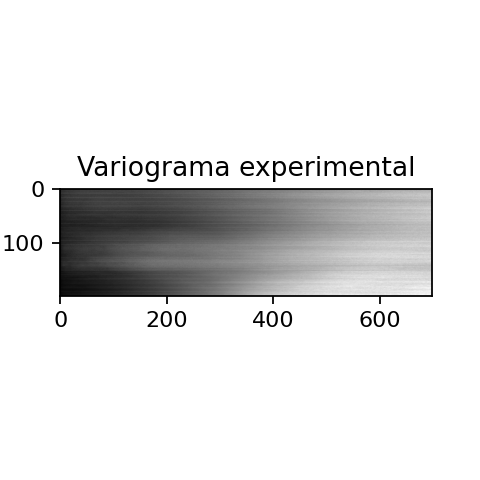

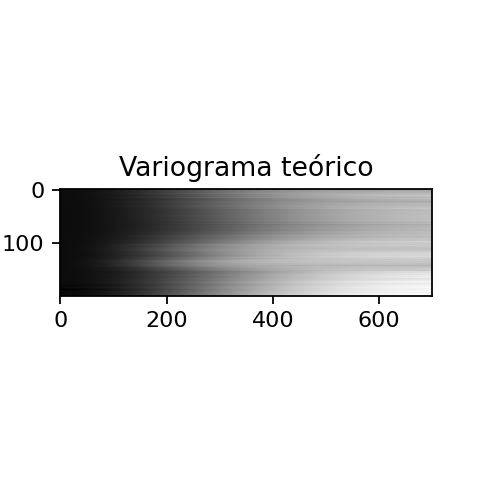

In [55]:
num_samplingx=num_x
num_samplingy=num_y
i_points = np.arange(0, 700)
y= np.arange(0, num_y)
x= np.arange(0, num_x)
var_exp_graf=np.ones([num_y,len(i_points)-1])
var_theo_graf=np.ones([num_y,len(i_points)])



for i in np.arange(0,num_y):
    z=gray[i,:]
    var_exp=experimental(x,z)
    var_exp.compute(i_points)
    var_exp_graf[i,:]=var_exp.variogram
    

    # aqui debería ir el fitting para hacer un cálculo iterativo

    fitting1 = fitting(type='gauss', var_exp=var_exp,                 
                   min_bound=np.array([1, 0, 0]),
                   max_bound=np.array([2, 50, 400]))
    
    cost, var_final, optimizer = fitting1.execute()



    var_theo = theoretical(h=i_points)
    var_theo.gauss(*fitting1.param_final)
    v_new = var_theo.get(i_points)
    var_theo_graf[i,:]=v_new
    

    




plt.figure()
plt.imshow(var_exp_graf)
plt.title('Variograma experimental')
plt.show()
plt.figure()
plt.imshow(var_theo_graf)
plt.title('Variograma teórico')
plt.show()



# Variograma según espacios de cielo

Primero haremos el variograma del cielo en distintas regiones para verificar que sale aprox bien

NameError: name 'plt' is not defined